<a href="https://colab.research.google.com/github/nazaita/Trabajo-de-Redes-Neuronales./blob/master/Trabajo_Redes_Neuronales_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Importamos Keras y Tenserflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

- Cargar Datos:

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

- Normalizamos las Imagenes.

In [ ]:
X_train, X_test = X_train / 255.0, X_test / 255.0

- Ajustamos las dimensiones para CNN

In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

- Convertir etiquetas a one-hot encoding

In [ ]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

- Creamos modelo convolucional (Cumpliendo con los requisitos de capas)

In [ ]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- Compilamos Modelo

In [ ]:
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

- Entrenamos el Modelo

In [ ]:
history = cnn_model.fit(X_train, y_train_one_hot,
                        epochs=5, batch_size=32,
                        validation_data=(X_test, y_test_one_hot))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 36ms/step - accuracy: 0.8443 - loss: 0.4804 - val_accuracy: 0.9818 - val_loss: 0.0557
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 91s 42ms/step - accuracy: 0.9722 - loss: 0.0937 - val_accuracy: 0.9878 - val_loss: 0.0352
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.9780 - loss: 0.0746 - val_accuracy: 0.9896 - val_loss: 0.0303
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 38ms/step - accuracy: 0.9823 - loss: 0.0556 - val_accuracy: 0.9911 - val_loss: 0.0280
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 32ms/step - accuracy: 0.9857 - loss: 0.0465 - val_accuracy: 0.9916 - val_loss: 0.0255


- Evaluamos Modelo

In [ ]:
_, cnn_accuracy = cnn_model.evaluate(X_test, y_test_one_hot, verbose=0)
print(f"Accuracy del modelo CNN: {cnn_accuracy * 100:.2f}%")

Accuracy del modelo CNN: 99.16%


- Curvas de Aprendizaje

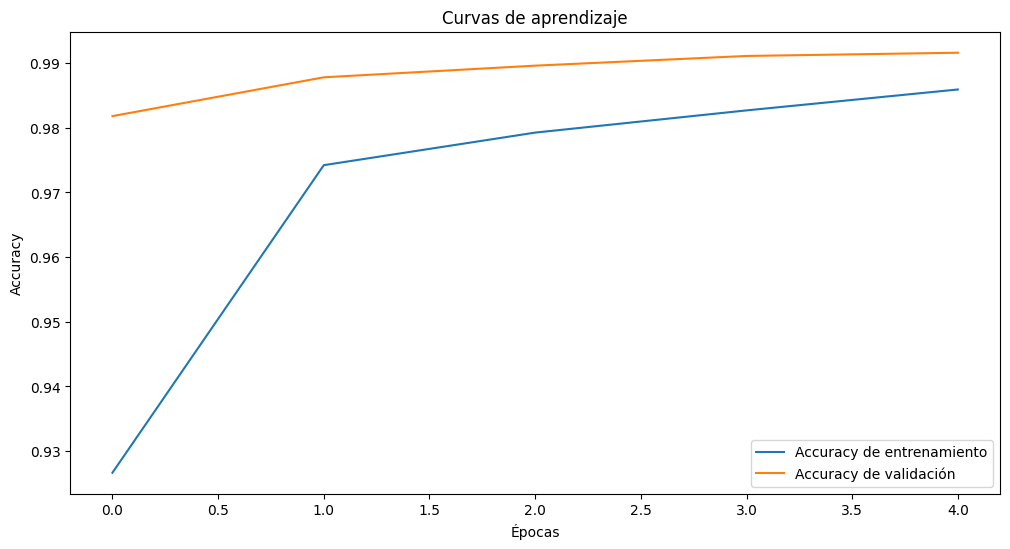

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Accuracy de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Accuracy de validación')
plt.title('Curvas de aprendizaje')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

- Predicciones


In [ ]:
predictions = cnn_model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


- Matriz de confusión

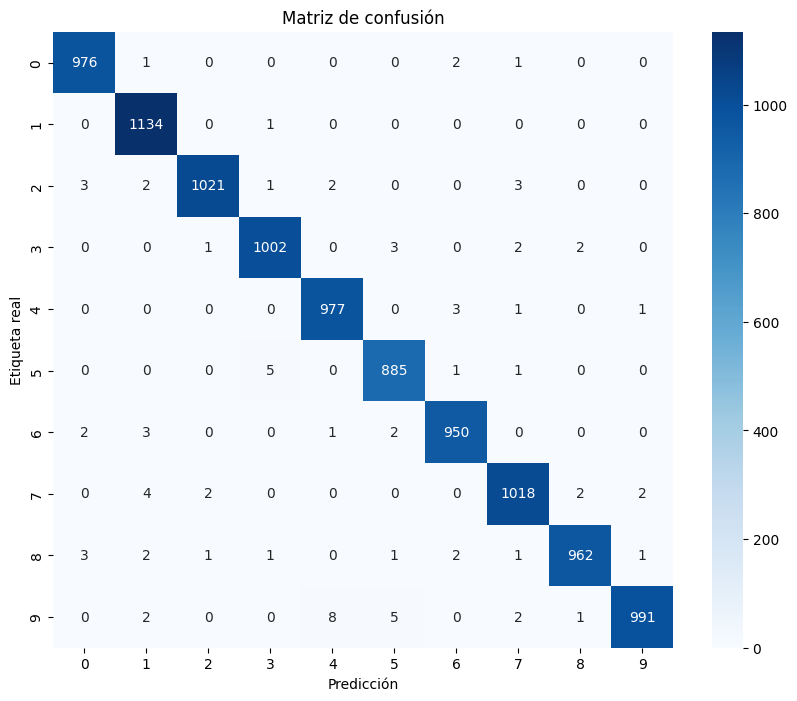

In [ ]:
conf_matrix = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Matriz de confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta real')
plt.show()

- Reporte de clasificación

In [ ]:
print("Reporte de clasificación:")
print(classification_report(y_test, predicted_labels))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



- Voy a visualizar las primeras 60 imágenes con sus predicciones


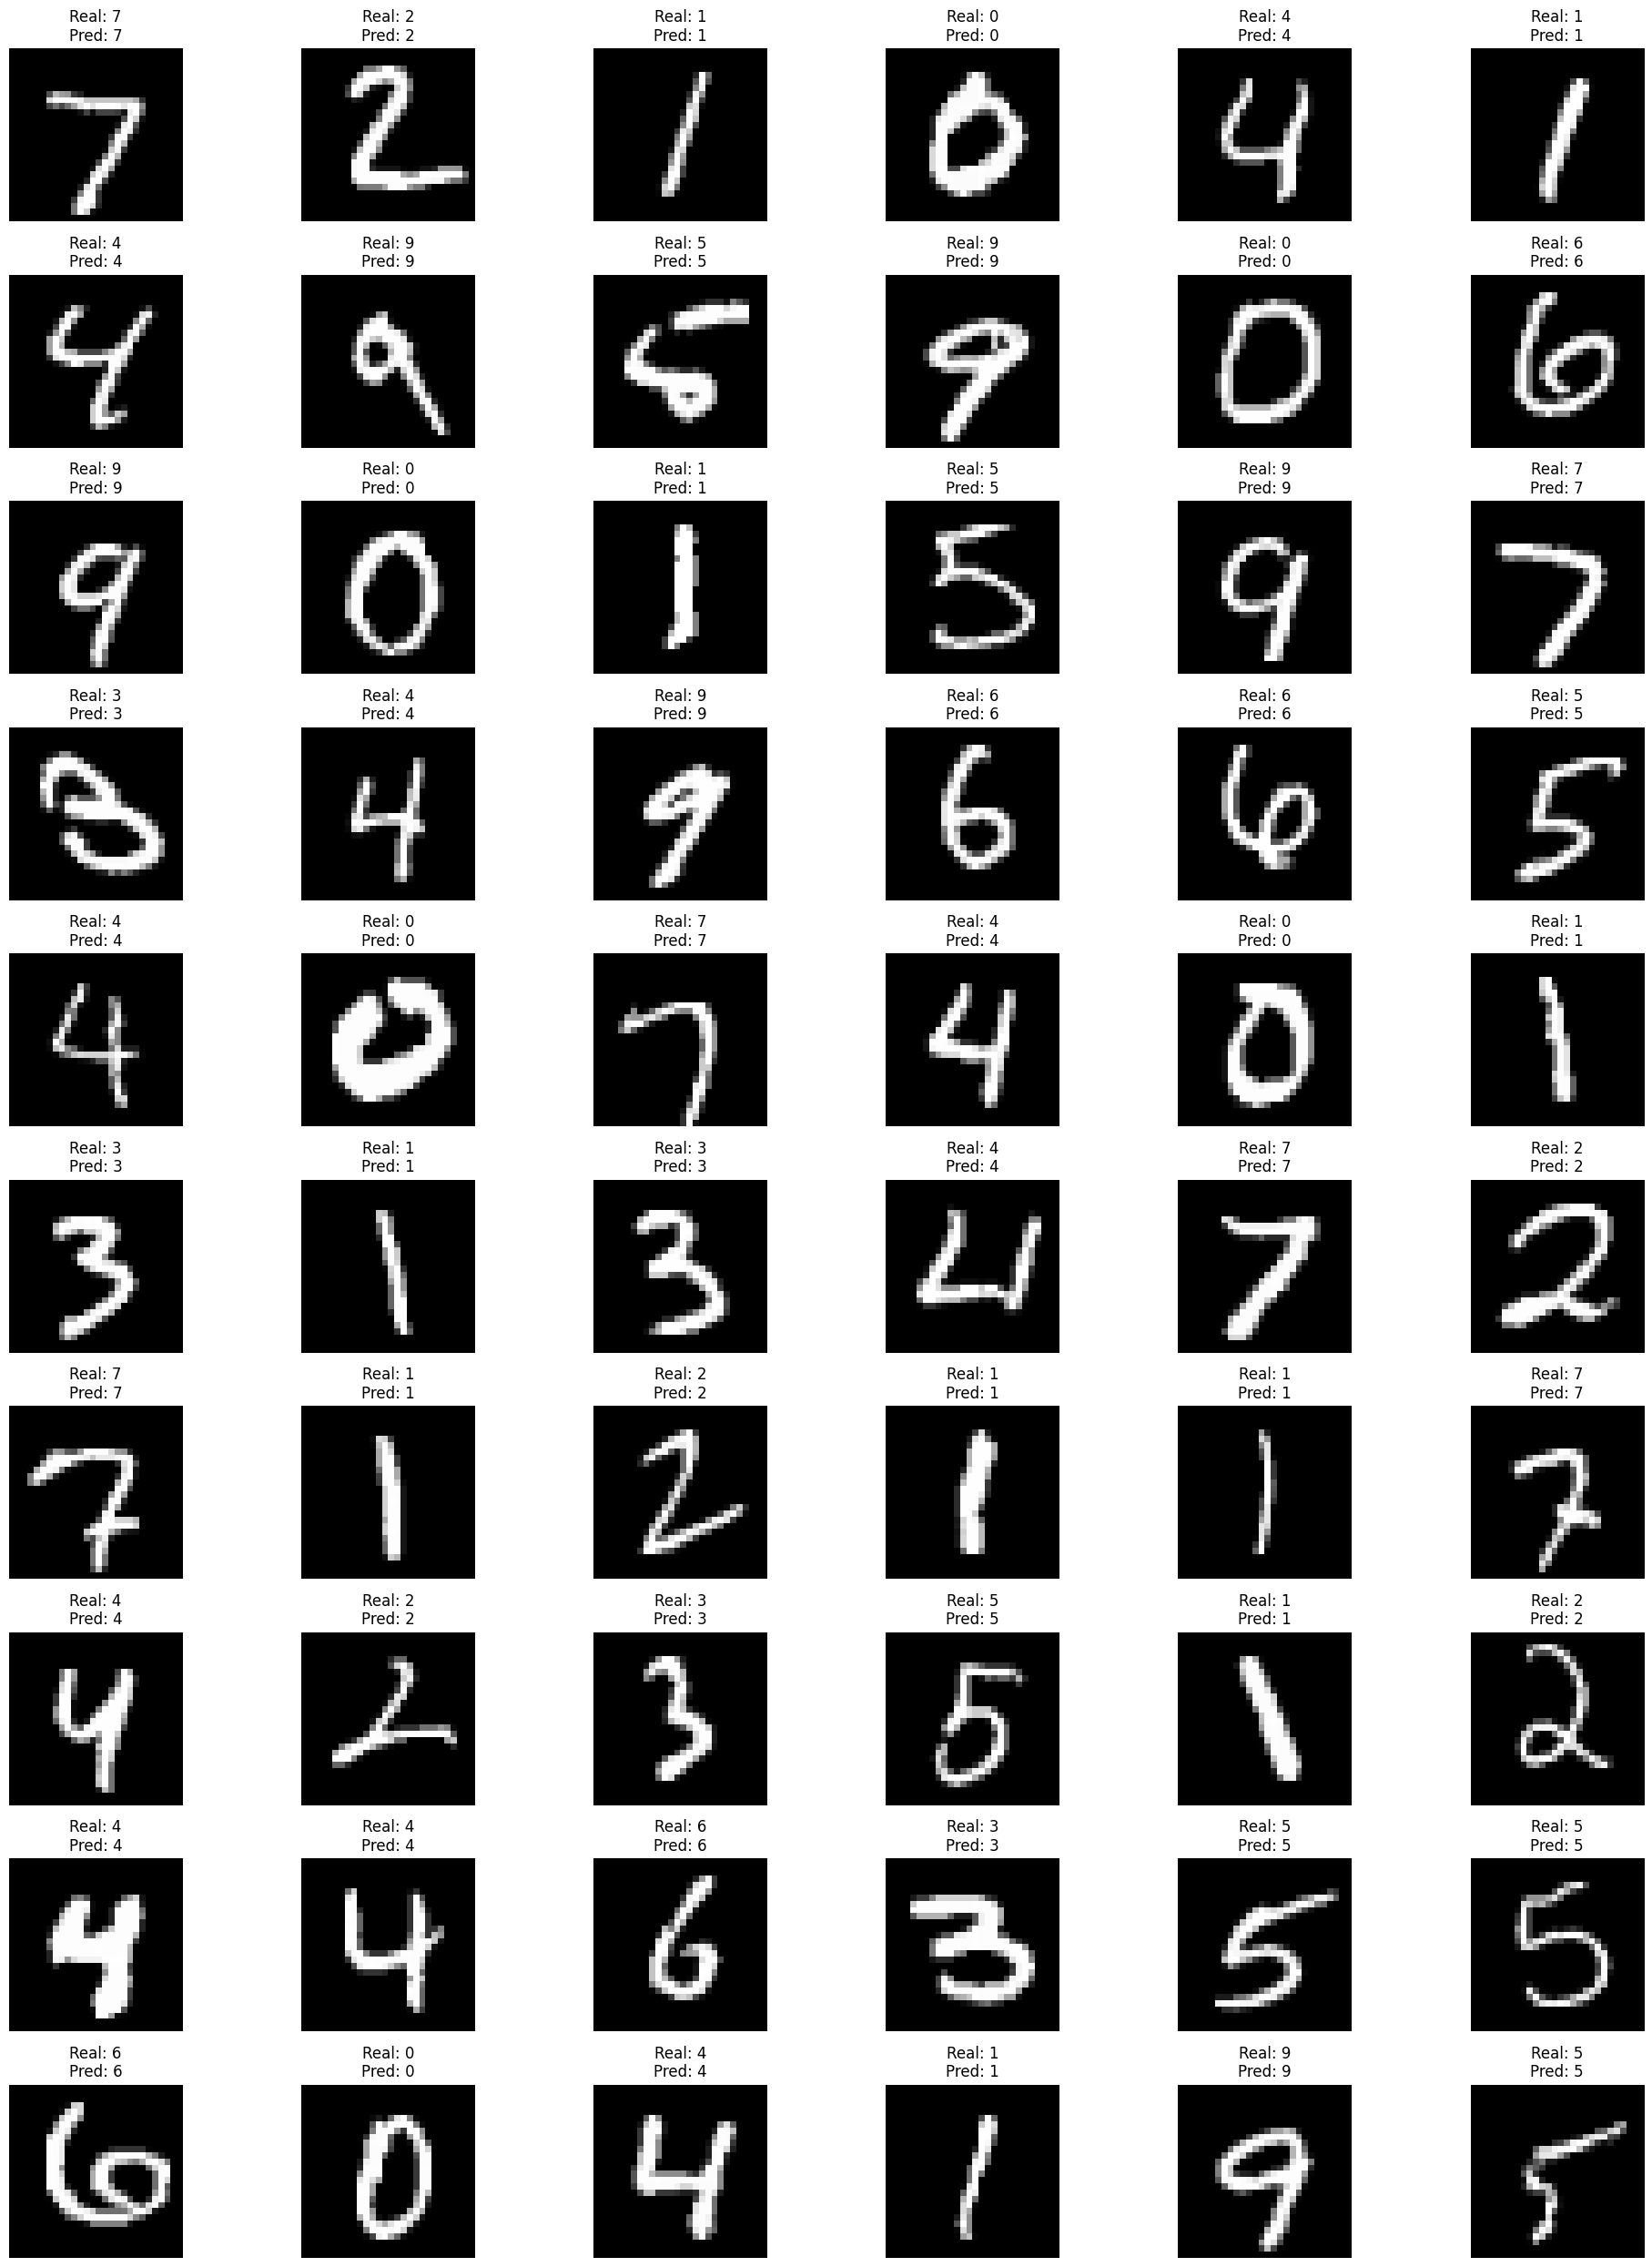

In [ ]:
plt.figure(figsize=(20, 25))
for i in range(60):
    plt.subplot(10, 6, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Real: {y_test[i]}\nPred: {predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

- Muestro detalles adicionales sobre las predicciones

In [ ]:
for i in range(60):
    print(f"Imagen {i + 1}:")
    print(f"Etiqueta real: {y_test[i]}")
    print(f"Predicción: {predicted_labels[i]}")
    print(f"Confianza: {np.max(predictions[i]) * 100:.2f}%")
    print("-" * 30)

Imagen 1:
Etiqueta real: 7
Predicción: 7
Confianza: 100.00%
------------------------------
Imagen 2:
Etiqueta real: 2
Predicción: 2
Confianza: 100.00%
------------------------------
Imagen 3:
Etiqueta real: 1
Predicción: 1
Confianza: 100.00%
------------------------------
Imagen 4:
Etiqueta real: 0
Predicción: 0
Confianza: 99.98%
------------------------------
Imagen 5:
Etiqueta real: 4
Predicción: 4
Confianza: 99.98%
------------------------------
Imagen 6:
Etiqueta real: 1
Predicción: 1
Confianza: 100.00%
------------------------------
Imagen 7:
Etiqueta real: 4
Predicción: 4
Confianza: 99.95%
------------------------------
Imagen 8:
Etiqueta real: 9
Predicción: 9
Confianza: 100.00%
------------------------------
Imagen 9:
Etiqueta real: 5
Predicción: 5
Confianza: 98.42%
------------------------------
Imagen 10:
Etiqueta real: 9
Predicción: 9
Confianza: 99.98%
------------------------------
Imagen 11:
Etiqueta real: 0
Predicción: 0
Confianza: 100.00%
------------------------------
Im

- Análisis de errores: Ejemplos donde el modelo falló

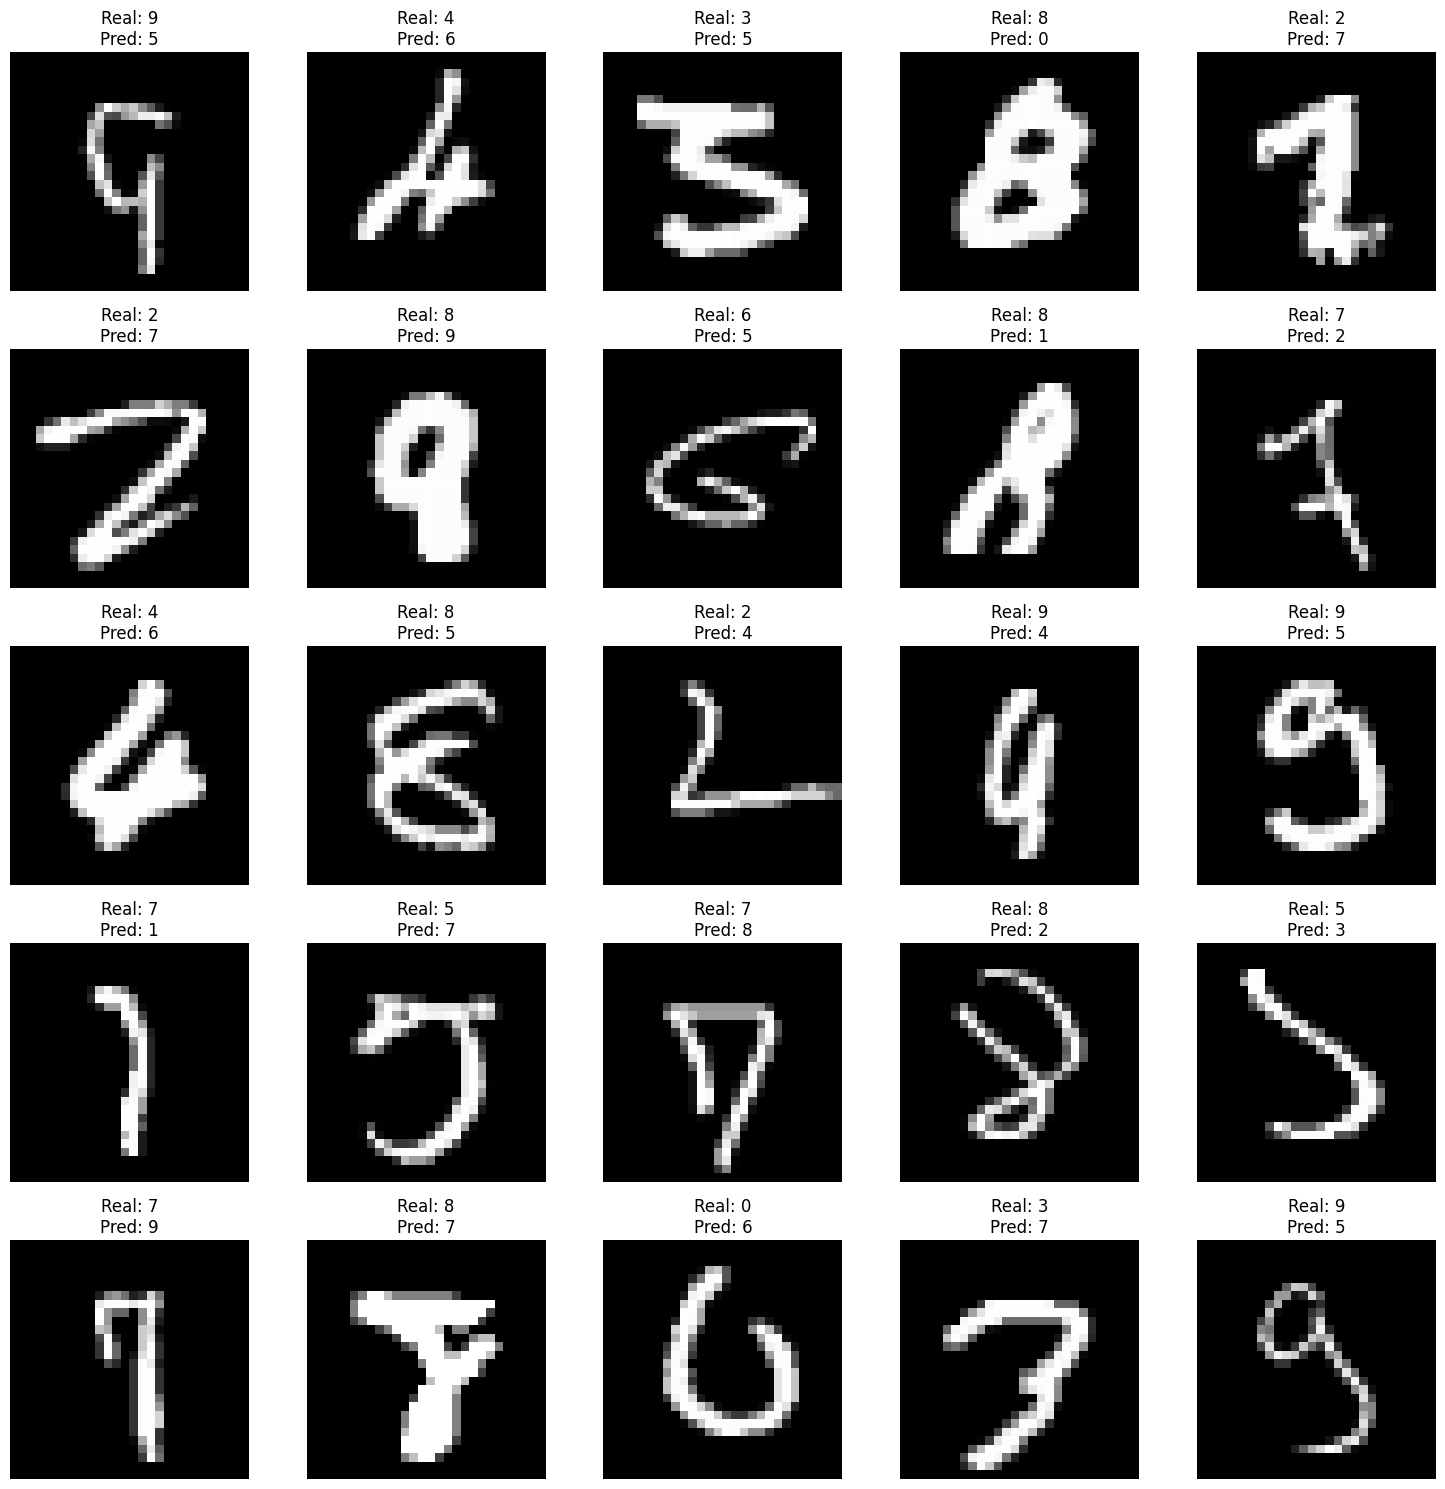

In [ ]:
errors = np.where(predicted_labels != y_test)[0]
plt.figure(figsize=(15, 15))
for i, error_idx in enumerate(errors[:25]):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[error_idx].reshape(28, 28), cmap='gray')
    plt.title(f"Real: {y_test[error_idx]}\nPred: {predicted_labels[error_idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

- CONCLUSION

1. Rendimiento del modelo:
   - El modelo basado en CNN alcanzó una precisión del {cnn_accuracy * 100:.2f}% en el conjunto de prueba, lo que refleja un buen rendimiento para la tarea de clasificación de dígitos escritos a mano.

2. Arquitectura de la red:
   - La red incluye dos capas convolucionales con max-pooling y dropout, seguidas de capas densas totalmente conectadas para la clasificación final. Esta arquitectura es efectiva para tareas de reconocimiento de imágenes.

3. Entrenamiento:
   - El modelo se entrenó en 5 épocas con un batch size de 32. Las curvas de aprendizaje muestran una mejora constante en la precisión de entrenamiento y validación.

4. Análisis de predicciones:
   - Se analizaron 60 predicciones iniciales y ejemplos de errores, identificando áreas donde el modelo podría mejorar. La matriz de confusión y el reporte de clasificación destacan las clases con mejor y peor desempeño.

5. Uso de TensorFlow:
   - TensorFlow facilitó la construcción y el entrenamiento del modelo, proporcionando herramientas para implementar arquitecturas complejas de manera eficiente.

En resumen, este trabajo demuestra la capacidad de las redes neuronales convolucionales para tareas de clasificación de imágenes y destaca la importancia del análisis de errores para mejorar el modelo